Available at  https://www.comp.nus.edu.sg/~winkler/IT3011/deep-learning.html

<h1>NUS IT3011 Machine Learning and Applications</h1>

<h2>Deep Learning</h2>


In this notebook, we will go through the concepts of Convolutional Neural Networks, Recurrent Neural Networks, Embeddings. We will also cover a few programming exercises. We will be using `PyTorch` to implement these architectures with some interesting datasets.

---
## 1 CNN Recap



In this notebook, we will learn about what is Convolutional Neural Network (CNN), and how to implement a CNN in PyTorch. 

As there are lots of great CNN tutorials on the Internet, we don't need to write a fresh version again. For most contents of this section, we are re-using a tutorial from the blog post: [https://algorithmia.com/blog/convolutional-neural-nets-in-pytorch](https://algorithmia.com/blog/convolutional-neural-nets-in-pytorch), which is very good for beginners to learn CNN using PyTorch; and we highly recommend it.  We modified some parts to add more detailed explanations and some exercises for you. 


### What is a Convolutional Neural Network (CNNs)?



Convolutional Neural Networks (ConvNets or CNNs) are a category of neural networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars. 

I think you already learned how CNN works in the lecture. So here I just do a quick recap of the key components in CNN:

- Convolutional Layer
- ReLU Layer
- Max Pooling
- Fully Connected Layers

If you are still confused about some of the above concepts, don't worry!  We recommend you to go through the Stanford CS231n lecture notes, which is widely considered as one of the best CNN tutorials by the community. The link is as follows:   

[http://cs231n.github.io/convolutional-networks/](http://cs231n.github.io/convolutional-networks/)



#### .a Convolution Layer



The CNN gets its name from the process of convolution. Think of convolution as applying a **filter** to our image. We pass over a mini image, usually called a kernel, and output the resulting filtered subset of our image.

<div align="center">
<img src="https://devblogs.nvidia.com/wp-content/uploads/2015/11/Convolution_schematic.gif" width=400>
<p> Figure 1. The convolution operation. </p>
</div>

(Diagram credit:  [http://deeplearning.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/](http://deeplearning.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/))

Since an image is just a bunch of pixel values, in practice this means multiplying small parts of our input images by the filter. There are a few parameters that get adjusted here: 

 - **Kernel Size** – the size of the filter.
 - **Kernel Type** – the values of the actual filter. Some examples include *identity*, *edge detection*, and *sharpen*.
 - **Stride** – the rate at which the kernel passes over the input image. A stride of 2 moves the kernel in 2 pixel increments.
 - **Padding** – we can add layers of 0s to the outside of the image in order to make sure that the kernel properly passes over the edges of the image.
 - **Output Layers** – how many different kernels are applied to the image.

The output of the convolution process is called the “convolved feature” or “feature map.” Remember: it’s just a filtered version of our original image where we multiplied some pixels by some numbers.

The resulting feature map can be viewed as a more optimal representation of the input image that’s more informative to the eventual neural network that the image will be passed through. In practice, convolution combined with the next two steps has been shown to greatly increase the accuracy of neural networks on images.

You’ll see the convolution step through the use of the `torch.nn.Conv2d()` function in Pytorch.

#### .b ReLU



Since the convolution operation is essentially a linear function; in CNN, we also need to add in a nonlinear function to help approximate non-linear relationship in the underlying data. 

The function most popular with CNNs is the ReLU function and it’s extremely simple. We already introduced ReLU to you in the Week 8 post-class notebook. Here for a quick recap, I give the formula of the ReLU function again, which is simply converts all negative pixel values to $0$. 

$$
R(z) = \max(0, z)
$$

And we also put the same Figure in Week 8 again to help you see the difference between Sigmoid and ReLU function. 

<div align="center">
<img src="https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png" width=400>
<p> Figure 2. The Sigmoid and ReLU Function.  </p>
</div>

 (Diagram Credit: From [https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6))

There are other functions that can be used to add non-linearity, like *tanh* or *softmax*. But in CNNs, ReLU is the most commonly used.

You’ll see the ReLU step through the use of the `torch.nn.relu()` function in Pytorch. 

#### .c Max Pooling



Another important part in CNNs is pooling, and the name describes it pretty well: we pass over sections of our image and pool them into the highest value in the section. Depending on the size of the pool, this can greatly reduce the size of the feature set that we pass into the neural network. This graphic from Stanford’s course page visualizes it simply: 

<div align="center">
<img src="https://blog.algorithmia.com/wp-content/uploads/2018/03/word-image-5.png" width=400>
<p> Figure 3. The max pooling operation.  </p>
</div>

 (Diagram Credit: From [https://blog.algorithmia.com/convolutional-neural-nets-in-pytorch/](https://blog.algorithmia.com/convolutional-neural-nets-in-pytorch/))
 
Max pooling also has a few of the same parameters as convolution that can be adjusted, like **stride** and **padding**. There are also other types of pooling that can be applied, like **sum pooling** or **average pooling**.

You’ll see the Max Pooling step through the use of the `torch.nn.MaxPool2d()` function in Pytorch. 

#### .d Fully Connected Layers



After the above steps are applied (convolution, ReLU, and max-pooling), the resulting image is passed into the traditional neural network architecture. Designing the optimal neural network is beyond the scope of this notebook, and we’ll be using a simple 2 layer format with one hidden layer and one output layer. 

This part of the CNN is almost identical to any other standard neural network. The key to understanding CNNs is this: the driver of better accuracy is the steps we take to engineer better features, not the classifier we end up passing those values through. Convolution, ReLU, and max pooling prepare our data for the neural network in a way that extracts all the useful information they have in an efficient manner. 

You’ll see the forward pass step through the use of the `torch.nn.Linear()` function in Pytorch.

## 2 CNN Coding Example

Now let's do some edge detection using convolutional neural networks!  We will see different kinds of filtering to detect horizontal, vertical or diagonal lines from an image, by using a simple CNN.

We will use the `pytorch` library, which we already used in the previous notebook. Let's first install the necessary libraries.

In [ ]:
### Import the pytorch libraries
import torch
import torchvision
import torch.nn as nn

!pip install Pillow>=4.1.1

import matplotlib.pyplot as plt
import numpy as np

Now we will define a convolutional neural network,  a simple one. In the following code block, we define a CNN which has only 1 `input channel`, 1 `output channel` and 3x3 `kernel matrix`.

In [ ]:
# Defining a simple CNN with 1 input channel, 1 output channel and kernel matrix size is 3x3.
# We use the most simple non-linear activation function here, the ReLU.
net = nn.Sequential(nn.Conv2d(1,1,3),nn.ReLU())

# Setting the bias value of the network to 0
net[0].bias.data = torch.FloatTensor([0])

In the following code block, we define a function which sets the weight vector of our neural network based on the input. For different settings of the weight vector, we obtain different forms of filtering.

In [ ]:
def edgeDetection(filterType):
  """ 
    Args:
        filterType (int) : type of filter (ranging from 1 to 4)
        
  """
   # setting the weight vector of the network to detect horizontal / vertical / diagonal lines
  if filterType == 1:
    net[0].weight.data = torch.FloatTensor ([[[[-0.5,1.0,-0.5],
                                               [-0.5,1.0,-0.5],
                                               [-0.5,1.0,-0.5]]]])
  elif filterType == 2:
    net[0].weight.data = torch.FloatTensor ([[[[-0.5,1.0,1.0],
                                               [1.0,-0.5,1.0],
                                               [1.0,1.0,-0.5]]]])
  elif filterType == 3:
    net[0].weight.data = torch.FloatTensor ([[[[ 1.0, 1.0, 1.0],
                                               [-0.5,-0.5,-0.5],
                                               [-0.5,-0.5,-0.5]]]])
  elif filterType == 4:
    net[0].weight.data = torch.FloatTensor ([[[[1.0,-0.5,-0.5],
                                               [-0.5,1.0,-0.5],
                                               [-0.5,-0.5,1.0]]]])

In the following code block, we download an image from an URL using the `torchvision` library. Then we display the image. We will use this image to check how the filtering works.

Let's check how the original image looks like.


'Detail of A Square Divided Horizontally and Vertically into Four Equal Parts, Each with a Different Direction of Alternating Parallel Bands of Lines', 1982, by Sol Lewitt


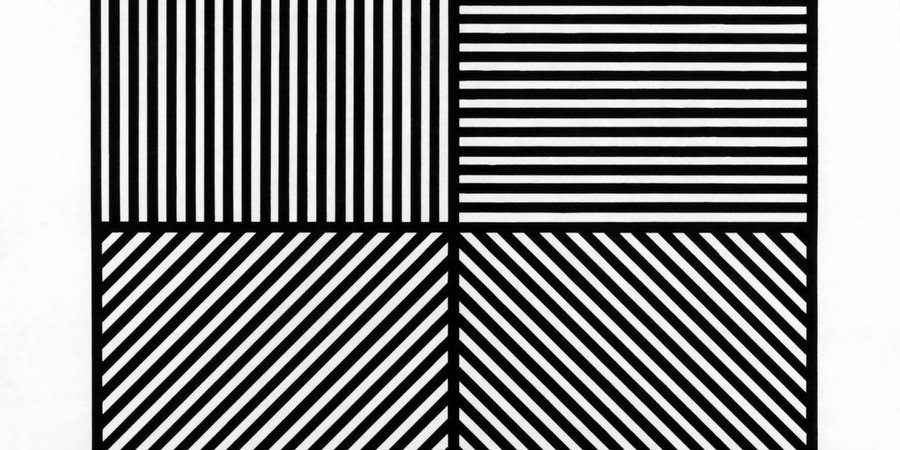

In [ ]:
from PIL import Image
# Downloading an image from a given URL using the torchvision library
torchvision.datasets.utils.download_url('https://d5wt70d4gnm1t.cloudfront.net/media/a-s/articles/1181-043236208562/close-look-sol-lewitt-900x450-c.jpg',root='data/image',filename="Picture.jpg",md5=None)

# Opening the image from the uploaded folder
k = Image.open('data/image/Picture.jpg').convert('L')

# Giving picture credits.  Sol Lewitt was a famous American artist connected with the minimist movement
# https://en.wikipedia.org/wiki/Sol_LeWitt
print ("'Detail of A Square Divided Horizontally and Vertically into Four Equal Parts, Each with a Different Direction of Alternating Parallel Bands of Lines', 1982, by Sol Lewitt")

# Showing the original image
k

Now we have everything we need. In this code block, we put together all of the code blocks we have written so far in a compact, standalone representation. We first convert the image to a `Tensor`. Finally, we call the `edgeDetection` function with different parameters ranging from $1$ to $4$ to achieve the different filtering types.

Let's explore how the filtering works.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  This is separate from the ipykernel package so we can avoid doing imports until


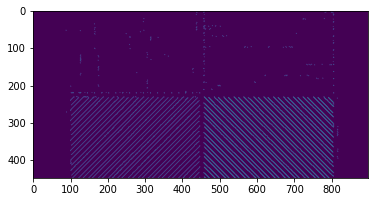

In [ ]:

# Loading the image as Tensor
m = torch.Tensor(np.asarray(k)).view([1,1,450,900])/256

#### 
edgeDetection(4) # change the parameter from 1 to 4 to see different type of filtering
####

# Filtering the image by passing it to the defined network
filteredImage = net(m.round()).detach()

# Displaying the image
plt.imshow(filteredImage[0,0])

# You can use the following code to see the image in a grid
#imshow(torchvision.utils.make_grid(net2(m.round()).detach()))

## 3 Programming : Recursive Neural Networks (RNNs)



**Classifying names with a character-level RNN**

We will be building and training a basic character-level RNN to classify
words. A character-level RNN reads words as a series of characters -
outputting a prediction and "hidden state" at each step, feeding its
previous hidden state into each next step. We take the final prediction
to be the output, i.e. which class the word belongs to.

Specifically, we'll train on a few thousand surnames from 18 languages
of origin, and predict which language a name is from based on the
spelling:

```
    (input) Hinton
    (-0.47) Scottish
    (-1.52) English
    (-3.57) Irish

    (input) Schmidhuber
    (-0.19) German
    (-2.48) Czech
    (-2.68) Dutch
```

**Credits**: This section is adapted from one of pytorch's official tutorials, which can be found [here](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html).

### .a Prepare environment and data

Let's start by importing the libraries and downloading the data. 

Run the following cell after restarting your environment and/or copying the notebook. Libraries that we need for the specific section will be loaded at the beginning of each section.

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random
import unicodedata
import string
import time
import math

import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

# Download the required data
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2021-03-20 03:48:11--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.84.214.12, 99.84.214.58, 99.84.214.80, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.84.214.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.07s   

2021-03-20 03:48:12 (37.5 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating

#### Clean and index data
The downloaded data are mostly romanized, however, we still need to convert them from Unicode to ASCII.

We also need to build the mapping from category (language) to specific names in order to retrieve training samples later.

We'll end up with a dictionary of lists of names per language, ```{language: [names ...]}```. 

In [ ]:
def findFiles(path): return glob.glob(path)
# print(findFiles('data/names/*.txt'))

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Build the category_names dictionary, a list of names per language
category_names = {}  # mapping from category (language) to name
all_categories = []  # list of all categories (languages)

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    names = readLines(filename)
    category_names[category] = names

# number of categories
n_categories = len(all_categories)

#### Turning names into Tensors
Now that we have all the names organized, we need to turn them into Tensors to make any use of them.

To represent a single letter, we use a "one-hot vector" of size <1 x n_letters>. 

A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>. 

To make a word we join a bunch of those into a 2D matrix <name_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes everything is in batches - we're just using a batch size of 1 here.

In [ ]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a name into a <name_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    for li, letter in enumerate(name):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

# This is just an example. You can change to something else and see what happens!
print(letterToTensor('J'))
print(nameToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


### .b Creating the network


You can implement an RNN in a very "pure" way, as regular feed-forward layers like Linear or Conv.

The RNN we use here is just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

 <div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/CS3244_1910/rnn_archi.png"  width = 450/>
<p>  A Simple Recurrent Neural Network. 
</div>

 (Diagram Credit: From [https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6](https://miro.medium.com/max/726/1*XxxiA0jJvPrHEJHD4z893g.png))

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # hidden states are 0 at the beginning
        return torch.zeros(1, self.hidden_size)

To create an instance of this network we need to specify:

- `n_letters` : number of all possible letters.
- `n_hidden` : number of hidden units and hidden state size.
- `n_categories` : number of categories. In our case it is 18.

We can now create our RNN as follows:

In [ ]:
rnn = RNN(input_size=n_letters, hidden_size=128, output_size=n_categories)

To run a step of this network we need to pass an input (in our case, the Tensor for the current letter) and a previous hidden state (which we initialize as zeros at first). We'll get back the output (probability of each language) and a next hidden state (which we keep for the next step).

In [ ]:
# Try the following code. You can try different names.
input = nameToTensor('Albert')
hidden = torch.zeros(1, 128)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9646, -2.8602, -2.9293, -2.8649, -2.8344, -2.8381, -2.9828, -2.8212,
         -2.9178, -2.8393, -2.9210, -2.9309, -2.9348, -2.9414, -2.9107, -2.8545,
         -2.7915, -2.9145]], grad_fn=<LogSoftmaxBackward>)


### .c Train the network

#### Prepare for training
Before going into training we should make a few helper functions. The
first is to interpret the output of the network, which we know to be a
likelihood of each category. We can use ``Tensor.topk`` to get the index
of the greatest value. We will also want a quick way to get a training example (a name and its language):

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    name = randomChoice(category_names[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return category, name, category_tensor, name_tensor


Finally, let's setup the train and evaluation engine.

**Your Turn (Question 6)** We removed some codes from `train_rnn()`. Please complete these two functions. The question marks in the template are placeholders for python statements.

In [ ]:
def train_rnn(category_tensor, name_tensor, loss_function, optimizer):
    hidden = rnn.initHidden()

    optimizer.zero_grad()

    
    ####### Your Turn ########
    #
    # We removed some code here, now it's your turn to make it run.
    # Consider the following template:
    #
    # for ? in range(?):
    #    output, hidden = rnn(?, ?)
    #########################

    loss = loss_function(output, category_tensor)
    loss.backward()
    optimizer.step()

    return output, loss.item()


**Your Turn (Question 7)** We removed some codes from `evaluate_rnn()`. Please complete these two functions. The question marks in the template are placeholders for python statements.

In [ ]:
def evaluate_rnn(name_tensor):
    hidden = rnn.initHidden()

    ####### Your Turn ########
    #
    # We removed some code here, now it's your turn to make it run.
    # Consider the following template:
    #
    # for ? in range(?):
    #    output, hidden = rnn(?, ?)
    #########################

    return output

#### Now let's train it
Now we just have to run that with a bunch of examples. Since the
``train`` function returns both the output and loss we can print its
guesses and also keep track of loss for plotting. Since there are 1000s
of examples we print only every ``print_every`` examples, and take an
average of the loss.

In [ ]:
# Hyperparameters
learning_rate = 0.005
n_iters       = 100000
print_every   = 5000
plot_every    = 1000
loss_function = nn.NLLLoss()
optimizer     = torch.optim.SGD(rnn.parameters(), learning_rate)

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for i in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train_rnn(category_tensor, line_tensor, loss_function, optimizer)
    current_loss += loss

    # Print iter number, loss, name and guess
    if i % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (i, i / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if i % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

### .d Evaluate the network
To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every actual language (rows)
which language the network guesses (columns). To calculate the confusion
matrix a bunch of samples are run through the network with
``evaluate_rnn()``, which is the same as ``train_rnn()`` minus the backprop.

In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 5000

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate_rnn(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(confusion, xticklabels=all_categories, yticklabels=all_categories, ax=ax)

**Your Turn (Question 8)**: Why do certain pairs of countries more easily confuse our RNN than other pairs?


You can also evaluate this RNN using your own input:


In [ ]:
#@title 
custom_input = "Xu"
def predict(input_name, n_predictions=3):
    print('\n> %s' % input_name)
    with torch.no_grad():
        output = evaluate_rnn(nameToTensor(input_name))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


predict(custom_input)

## 4 Image Classification with CNN





Next, we will implement CNN using PyTorch. We start by installing Pytorch and importing the libaries. We copied the code here so that you can start the post-class notebook with ou running the code above.



In [ ]:
### Load the pytorch libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable

# Load the other neccesary libraries
import matplotlib.pyplot as plt
import numpy as np
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

### .a Gathering and Loading Data

As with most Machine Learning projects, a minority of the code you end up writing has to do with actual statistics––most is spent on gathering, cleaning, and readying your data for analysis. CNNs in Pytorch are no exception.

Pytorch ships with the `torchvision` package, which makes it easy to download and use datasets for CNNs. To stick with convention and benchmark accurately, we’ll use the **CIFAR-10 dataset**. CIFAR-10 contains images of 10 different classes, and is a standard library of sorts used for CNN building. 

The first step to get our data is to use Pytorch and download it. This may take a few minites to finish. 



In [ ]:
## The compose function allows for multiple transforms
#
# transforms.ToTensor() converts our PILImage to a tensor of shape (C x H x W) in the range [0,1]
# transforms.Normalize(mean,std) normalizes a tensor to a (mean, std) for (R, G, B)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./cifardata', train=False, download=True, transform=transform)


Extracting ./cifardata/cifar-10-python.tar.gz to ./cifardata
Files already downloaded and verified


We then designate the 10 possible labels for each image:

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

The final step of data preparation is to define **data samplers** for our images. Data samplers are a very useful tool in PyTorch that helps us to split all of the available training examples into training, test, and cross validation sets when we train our model later on. 

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

# Training
n_training_samples = 20000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

# Validation
n_val_samples = 5000
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

# Test
n_test_samples = 5000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

OK, now let us visualize some of the data samples in the CIFAR-10 dataset by running the following code:

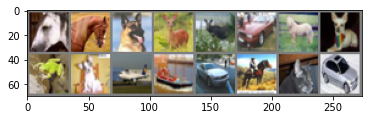

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, sampler=train_sampler)
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

### .b Designing a Neural Net in Pytorch

Pytorch makes it pretty easy to implement all of those key components that we described above. We’ll be making use of 4 major functions in our CNN class: 

 - `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)` – applies convolution

- `torch.nn.relu(x)` – applies ReLU

- `torch.nn.MaxPool2d(kernel_size, stride, padding)` – applies Max Pooling

- `torch.nn.Linear(in_features, out_features)` – fully connected layer (multiply inputs by learned weights)

Now as we already get all components at hand, let's begin to write our CNN code in Pytorch. We’ll create a `SimpleCNN` class which inherits from the master `torch.nn.Module` class. 



In [ ]:
from torch.autograd import Variable
import torch.nn.functional as F

# class SimpleCNN(torch.nn.Module):
    
#     # Our batch shape for input x is (3, 32, 32)
    
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
        
#         # Input channels = 3, output channels = 18
#         self.conv1 = torch.nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1)
#         self.conv2 = torch.nn.Conv2d(20, 36, kernel_size=3, stride=1, padding=1)
#         self.conv3 = torch.nn.Conv2d(36, 48, kernel_size=3, stride=1, padding=1)
#         self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
#         # 4608 input features, 64 output features (see sizing flow below)
#         self.fc1 = torch.nn.Linear(48 * 16 * 16, 64)
        
#         # 64 input features, 10 output features for our 10 defined classes
#         self.fc2 = torch.nn.Linear(64, 10)
        
#     def forward(self, x):
        
#         # Computes the activation of the first convolution
#         # Size changes from (3, 32, 32) to (18, 32, 32)
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = F.relu(self.conv3(x))
        
#         # Size changes from (18, 32, 32) to (18, 16, 16)
#         x = self.pool(x)
        
#         # Reshape data to input to the input layer of the neural net
#         # Size changes from (18, 16, 16) to (1, 4608)
#         # Recall that the -1 infers this dimension from the other given dimension
#         x = x.view(-1, 48*16*16)
        
#         # Computes the activation of the first fully connected layer
#         # Size changes from (1, 4608) to (1, 64)
#         x = F.relu(self.fc1(x))
        
#         # Computes the second fully connected layer (activation applied later)
#         # Size changes from (1, 64) to (1, 10)
#         x = self.fc2(x)
#         return(x)

Let’s explain what’s going on here. We’re creating a `SimpleCNN` class with one class method: `forward`. The `forward()` method computes a forward pass of the CNN, which includes the four steps we outlined above. When an instance of the SimpleCNN class is created, we define internal functions to represent the layers of the net. During the forward pass we call these internal functions.

One of the pesky parts about manually defining neural nets is that we need to specify the sizes of inputs and outputs at each part of the process. The comments should give some direction as to what’s happening with size changes at each step. 

You can see that in the above codes, the input dimension is **(3, 32, 32)**, which means our input image has $3$ input channels, and each channel has a resolution of $32 \times 32$. The number of output channels is set to $18$, meaning that we have $18$ different kernels, and the `kernel size` is set to $3$, which means the size of each kernel is $3\times 3$. And for the convolution operation, we set `stride = 1` and `padding = 1`. Under this setting, we get an output tensor with shape **(18, 32, 32)** after the convolution.  



After the convolution, we send the output tensor (shape is **(18, 32, 32)**) to a max pooling layer, in which the parameters are set to: `kernel_size = 2`, `stride = 2`, and `padding = 0`. This results in a tensor with shape **(18, 16, 16)**. 

### .c Training our CNN in Pytorch



Once we’ve defined the class for our CNN, we need to train the net itself. This is where neural network code gets interesting. If you’re working with more basic types of machine learning algorithms, you can usually get meaningful output in just a few lines of code. But with neural networks in Pytorch (and TensorFlow) though, it takes a bunch more code than that. Our basic flow is **a training loop**: each time we pass through the loop (called and “epoch”), we compute a forward pass on the network and implement backpropagation to adjust the weights. We’ll also record some other measurements like loss and time passed, so that we can analyze them as the net trains itself. 

To start, we’ll define our **data loaders** using the samplers we created above.


In [ ]:
# DataLoader takes in a dataset and a sampler for loading (num_workers deals with system level memory) 
def get_train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
    return(train_loader)

In [ ]:
# Test and validation loaders have constant batch sizes, so we can define them directly
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, sampler=test_sampler, num_workers=2)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler, num_workers=2)

We’ll also define our loss and optimizer functions that the CNN will use to find the right weights. We’ll be using **Cross Entropy Loss (Log Loss)** as our loss function, which strongly penalizes high confidence in the wrong answer. The optimizer is the popular **Adam** algorithm. 

In [ ]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

Finally, we’ll define a function to train our CNN using a simple for loop. 

In [ ]:
import time

def trainNet(net, batch_size, n_epochs, learning_rate):
    
    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    #Get training data
    train_loader = get_train_loader(batch_size)
    n_batches = len(train_loader)
    
    # Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)
    
    # Time for printing
    training_start_time = time.time()
    
    # Loop for n_epochs
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            # Get inputs
            inputs, labels = data
            
            # Set the parameter gradients to zero
            optimizer.zero_grad()
            
            # Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            #Print statistics
            running_loss += loss_size.item()
            total_train_loss += loss_size.item()
            
            # Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                running_loss = 0.0
                start_time = time.time()
            
        # At the end of the epoch, do a pass on the validation set
        total_val_loss = 0
        for inputs, labels in val_loader:
            
            # Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.item()
            
        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))
        
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))

During each epoch of training, we pass data to the model **in batches** whose size we define when we call the training loop. Data is feature engineered using the SimpleCNN class we’ve defined, and then basic metrics are printed after a few passes. During each loop, we also calculate the loss on our validation set. 

To actually train the net now only requires two lines of code: 

In [ ]:
#@title Default title text
CNN = SimpleCNN()
trainNet(CNN, batch_size=64, n_epochs=6, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 64
epochs= 6
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.34 took: 7.32s
Epoch 1, 20% 	 train_loss: 2.23 took: 6.92s
Epoch 1, 30% 	 train_loss: 2.12 took: 7.07s
Epoch 1, 40% 	 train_loss: 2.06 took: 7.05s
Epoch 1, 51% 	 train_loss: 1.97 took: 7.29s
Epoch 1, 61% 	 train_loss: 1.97 took: 6.86s
Epoch 1, 71% 	 train_loss: 1.92 took: 7.02s
Epoch 1, 81% 	 train_loss: 1.87 took: 6.94s
Epoch 1, 92% 	 train_loss: 1.84 took: 7.13s
Validation loss = 1.75
Epoch 2, 10% 	 train_loss: 1.79 took: 7.26s
Epoch 2, 20% 	 train_loss: 1.80 took: 7.05s
Epoch 2, 30% 	 train_loss: 1.78 took: 7.07s
Epoch 2, 40% 	 train_loss: 1.73 took: 7.32s
Epoch 2, 51% 	 train_loss: 1.76 took: 7.08s
Epoch 2, 61% 	 train_loss: 1.67 took: 7.08s
Epoch 2, 71% 	 train_loss: 1.69 took: 7.02s
Epoch 2, 81% 	 train_loss: 1.66 took: 6.96s
Epoch 2, 92% 	 train_loss: 1.66 took: 6.95s
Validation loss = 1.55
Epoch 3, 10% 	 train_loss: 1.57 took: 7.21s
Epoch 3, 20% 	 train_loss: 1.59 took: 7.29s

In [ ]:
trainNet(CNN, batch_size=64, n_epochs=6, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 64
epochs= 6
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 1.37 took: 7.54s
Epoch 1, 20% 	 train_loss: 1.31 took: 6.93s
Epoch 1, 30% 	 train_loss: 1.33 took: 6.90s
Epoch 1, 40% 	 train_loss: 1.37 took: 7.09s
Epoch 1, 51% 	 train_loss: 1.30 took: 7.02s
Epoch 1, 61% 	 train_loss: 1.28 took: 6.92s
Epoch 1, 71% 	 train_loss: 1.32 took: 6.94s
Epoch 1, 81% 	 train_loss: 1.30 took: 7.00s
Epoch 1, 92% 	 train_loss: 1.30 took: 7.02s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.30 took: 7.25s
Epoch 2, 20% 	 train_loss: 1.28 took: 7.03s
Epoch 2, 30% 	 train_loss: 1.27 took: 7.32s
Epoch 2, 40% 	 train_loss: 1.25 took: 7.06s
Epoch 2, 51% 	 train_loss: 1.26 took: 6.99s
Epoch 2, 61% 	 train_loss: 1.27 took: 7.16s
Epoch 2, 71% 	 train_loss: 1.24 took: 7.07s
Epoch 2, 81% 	 train_loss: 1.31 took: 7.16s
Epoch 2, 92% 	 train_loss: 1.29 took: 6.95s
Validation loss = 1.30
Epoch 3, 10% 	 train_loss: 1.26 took: 7.22s
Epoch 3, 20% 	 train_loss: 1.29 took: 7.40s

In [ ]:
trainNet(CNN, batch_size=64, n_epochs=6, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 64
epochs= 6
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 1.05 took: 7.44s
Epoch 1, 20% 	 train_loss: 1.09 took: 7.32s
Epoch 1, 30% 	 train_loss: 1.11 took: 7.27s
Epoch 1, 40% 	 train_loss: 1.10 took: 7.47s
Epoch 1, 51% 	 train_loss: 1.11 took: 7.36s
Epoch 1, 61% 	 train_loss: 1.10 took: 7.13s
Epoch 1, 71% 	 train_loss: 1.10 took: 7.24s
Epoch 1, 81% 	 train_loss: 1.14 took: 7.07s
Epoch 1, 92% 	 train_loss: 1.12 took: 7.14s
Validation loss = 1.21
Epoch 2, 10% 	 train_loss: 1.04 took: 7.55s
Epoch 2, 20% 	 train_loss: 1.03 took: 7.22s
Epoch 2, 30% 	 train_loss: 1.10 took: 7.25s
Epoch 2, 40% 	 train_loss: 1.08 took: 7.23s
Epoch 2, 51% 	 train_loss: 1.07 took: 7.30s
Epoch 2, 61% 	 train_loss: 1.07 took: 7.17s
Epoch 2, 71% 	 train_loss: 1.07 took: 7.23s
Epoch 2, 81% 	 train_loss: 1.09 took: 7.23s
Epoch 2, 92% 	 train_loss: 1.05 took: 7.33s
Validation loss = 1.20
Epoch 3, 10% 	 train_loss: 1.03 took: 7.51s
Epoch 3, 20% 	 train_loss: 1.04 took: 7.13s

In [ ]:
trainNet(CNN, batch_size=64, n_epochs=6, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 64
epochs= 6
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 0.92 took: 7.28s
Epoch 1, 20% 	 train_loss: 0.92 took: 7.21s
Epoch 1, 30% 	 train_loss: 0.92 took: 7.20s
Epoch 1, 40% 	 train_loss: 0.94 took: 7.19s
Epoch 1, 51% 	 train_loss: 0.93 took: 7.12s
Epoch 1, 61% 	 train_loss: 0.92 took: 7.16s
Epoch 1, 71% 	 train_loss: 0.89 took: 7.13s
Epoch 1, 81% 	 train_loss: 0.92 took: 7.25s
Epoch 1, 92% 	 train_loss: 0.92 took: 7.33s
Validation loss = 1.22
Epoch 2, 10% 	 train_loss: 0.89 took: 7.33s
Epoch 2, 20% 	 train_loss: 0.88 took: 7.18s
Epoch 2, 30% 	 train_loss: 0.91 took: 7.25s
Epoch 2, 40% 	 train_loss: 0.88 took: 7.11s
Epoch 2, 51% 	 train_loss: 0.89 took: 7.24s
Epoch 2, 61% 	 train_loss: 0.87 took: 7.30s
Epoch 2, 71% 	 train_loss: 0.93 took: 7.23s
Epoch 2, 81% 	 train_loss: 0.89 took: 7.43s
Epoch 2, 92% 	 train_loss: 0.92 took: 7.28s
Validation loss = 1.17
Epoch 3, 10% 	 train_loss: 0.83 took: 7.43s
Epoch 3, 20% 	 train_loss: 0.86 took: 7.19s

In [ ]:
trainNet(CNN, batch_size=64, n_epochs=6, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 64
epochs= 6
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 0.79 took: 7.38s
Epoch 1, 20% 	 train_loss: 0.72 took: 7.16s
Epoch 1, 30% 	 train_loss: 0.76 took: 7.16s
Epoch 1, 40% 	 train_loss: 0.75 took: 7.04s
Epoch 1, 51% 	 train_loss: 0.77 took: 7.16s
Epoch 1, 61% 	 train_loss: 0.75 took: 7.08s
Epoch 1, 71% 	 train_loss: 0.77 took: 7.06s
Epoch 1, 81% 	 train_loss: 0.74 took: 7.04s
Epoch 1, 92% 	 train_loss: 0.77 took: 6.96s
Validation loss = 1.21
Epoch 2, 10% 	 train_loss: 0.72 took: 7.16s
Epoch 2, 20% 	 train_loss: 0.70 took: 7.02s
Epoch 2, 30% 	 train_loss: 0.74 took: 7.10s
Epoch 2, 40% 	 train_loss: 0.73 took: 7.28s
Epoch 2, 51% 	 train_loss: 0.71 took: 7.06s
Epoch 2, 61% 	 train_loss: 0.72 took: 7.05s
Epoch 2, 71% 	 train_loss: 0.77 took: 7.03s
Epoch 2, 81% 	 train_loss: 0.76 took: 7.14s
Epoch 2, 92% 	 train_loss: 0.73 took: 7.33s
Validation loss = 1.21
Epoch 3, 10% 	 train_loss: 0.68 took: 7.34s
Epoch 3, 20% 	 train_loss: 0.66 took: 7.11s

### .d Evaluation 

After the training, now let's see if our CNN works by evaluating the classfication accuracy in the test data:

In [ ]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    outputs = CNN(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test images: %f %%' % (100 * float(correct) / total))

Accuracy of the network on the test images: 60.400000 %


OK, maybe you were expecting a better classification accuracy. This is exactly the work for you to do. Try to tune the network structure or hyper-parameters of the simple CNN in order to get a better classification accuracy. We know that tuning the neural network is the least interesting thing you want to do, because it's boring and annoying. But this is what you, as a beginner, have to do and is also a good way to help you understand CNN better. 

After you finish, please record your best accuracy achieved and its corresponding network and parameter settings. 

**Your Turn (Question 7):** What is the best classification accuracy you achieved?



**Your Turn (Question 8):**  What is the network structure and parameter settings for your best experiment?


## 5 Embeddings

Finally, if you want to learn more about Embeddings and some of their practical applications (specifically, text sentiment analysis), Google has a nice [python tutorial](https://colab.research.google.com/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb) on the topic.


---
# Credits
Authored by Martin Strobel, Xu Ziwei, [Liangming Pan](https://www.liangmingpan.com), [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).
Please retain and add to this credits cell if using this material as a whole or in part.
